# Big Mart Sales Prediction

## Introduction
This project uses the data collected from Big Mart Retail Chain. The problem statement is to predict the sales for each of the item given the attributes of both the item and the outlet the item is being sold. The dataset used here is downloaded from Kaggle.

## Table of Contents
- Importing Libraries and Dataset
- Exploratory Data Analysis
    - Univariate
    - Bivariate
- Feature Transformation
    - Dummy Encoding
    - Feature Scaling
- Dimensionality Reduction
- Predictive Modelling
    - Baseline Model
    - Hyperparameter Tuning
    - Bagging
    - Boosting
    - Final Model and Predictions

## Importing Libraries and Dataset

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
original = df.copy()

In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Two of the features have missing values and require imputation.

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Exploratory Data Analysis

### Univariate Analysis

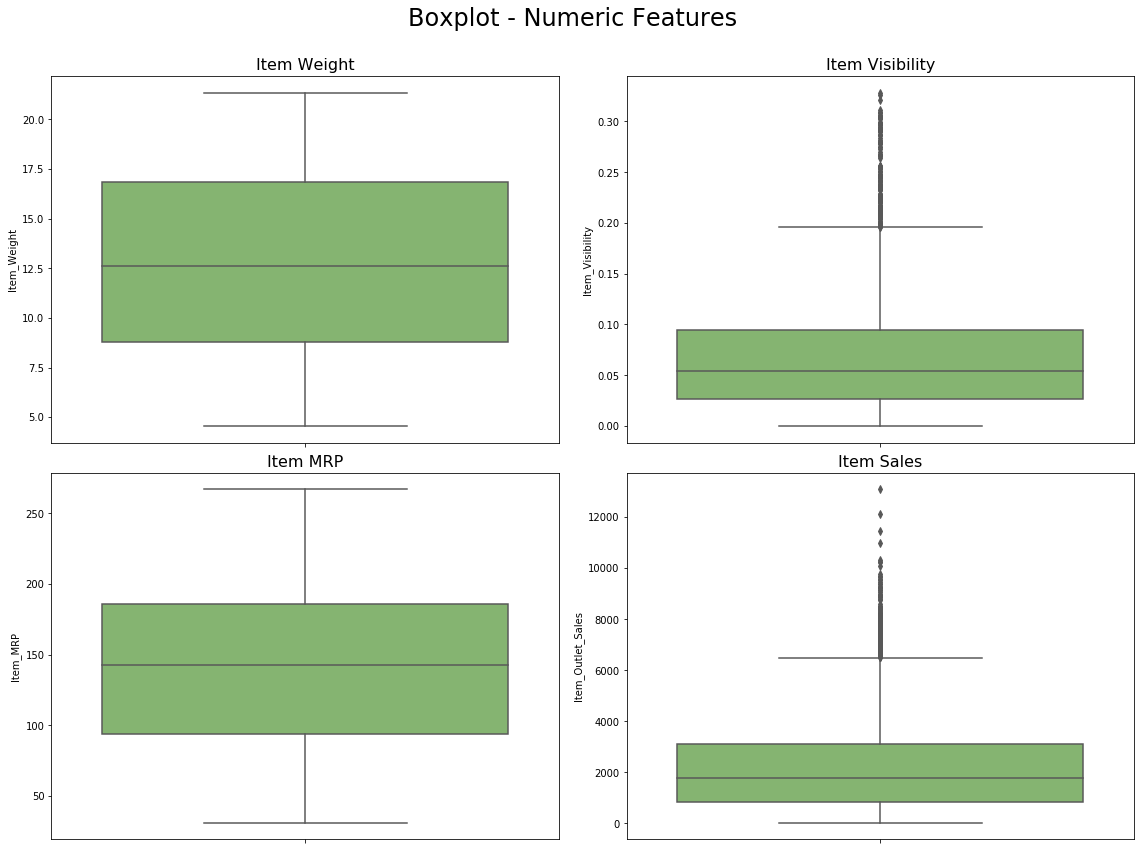

In [29]:
fig, ax = plt.subplots(figsize = (16, 12))

plt.subplot(221)
sns.boxplot(y = 'Item_Weight', data = df, palette = 'summer')
plt.title('Item Weight', fontsize= 16)

plt.subplot(222)
sns.boxplot(y = 'Item_Visibility', data = df, palette = 'summer')
plt.title('Item Visibility', fontsize= 16)

plt.subplot(223)
sns.boxplot(y = 'Item_MRP', data = df, palette = 'summer')
plt.title('Item MRP', fontsize= 16)

plt.subplot(224)
sns.boxplot(y = 'Item_Outlet_Sales', data = df, palette = 'summer')
plt.title('Item Sales', fontsize= 16)

plt.tight_layout()
fig.suptitle('Boxplot - Numeric Features', fontsize = 24, va = 'top')
plt.subplots_adjust(top = 0.90)
plt.show()

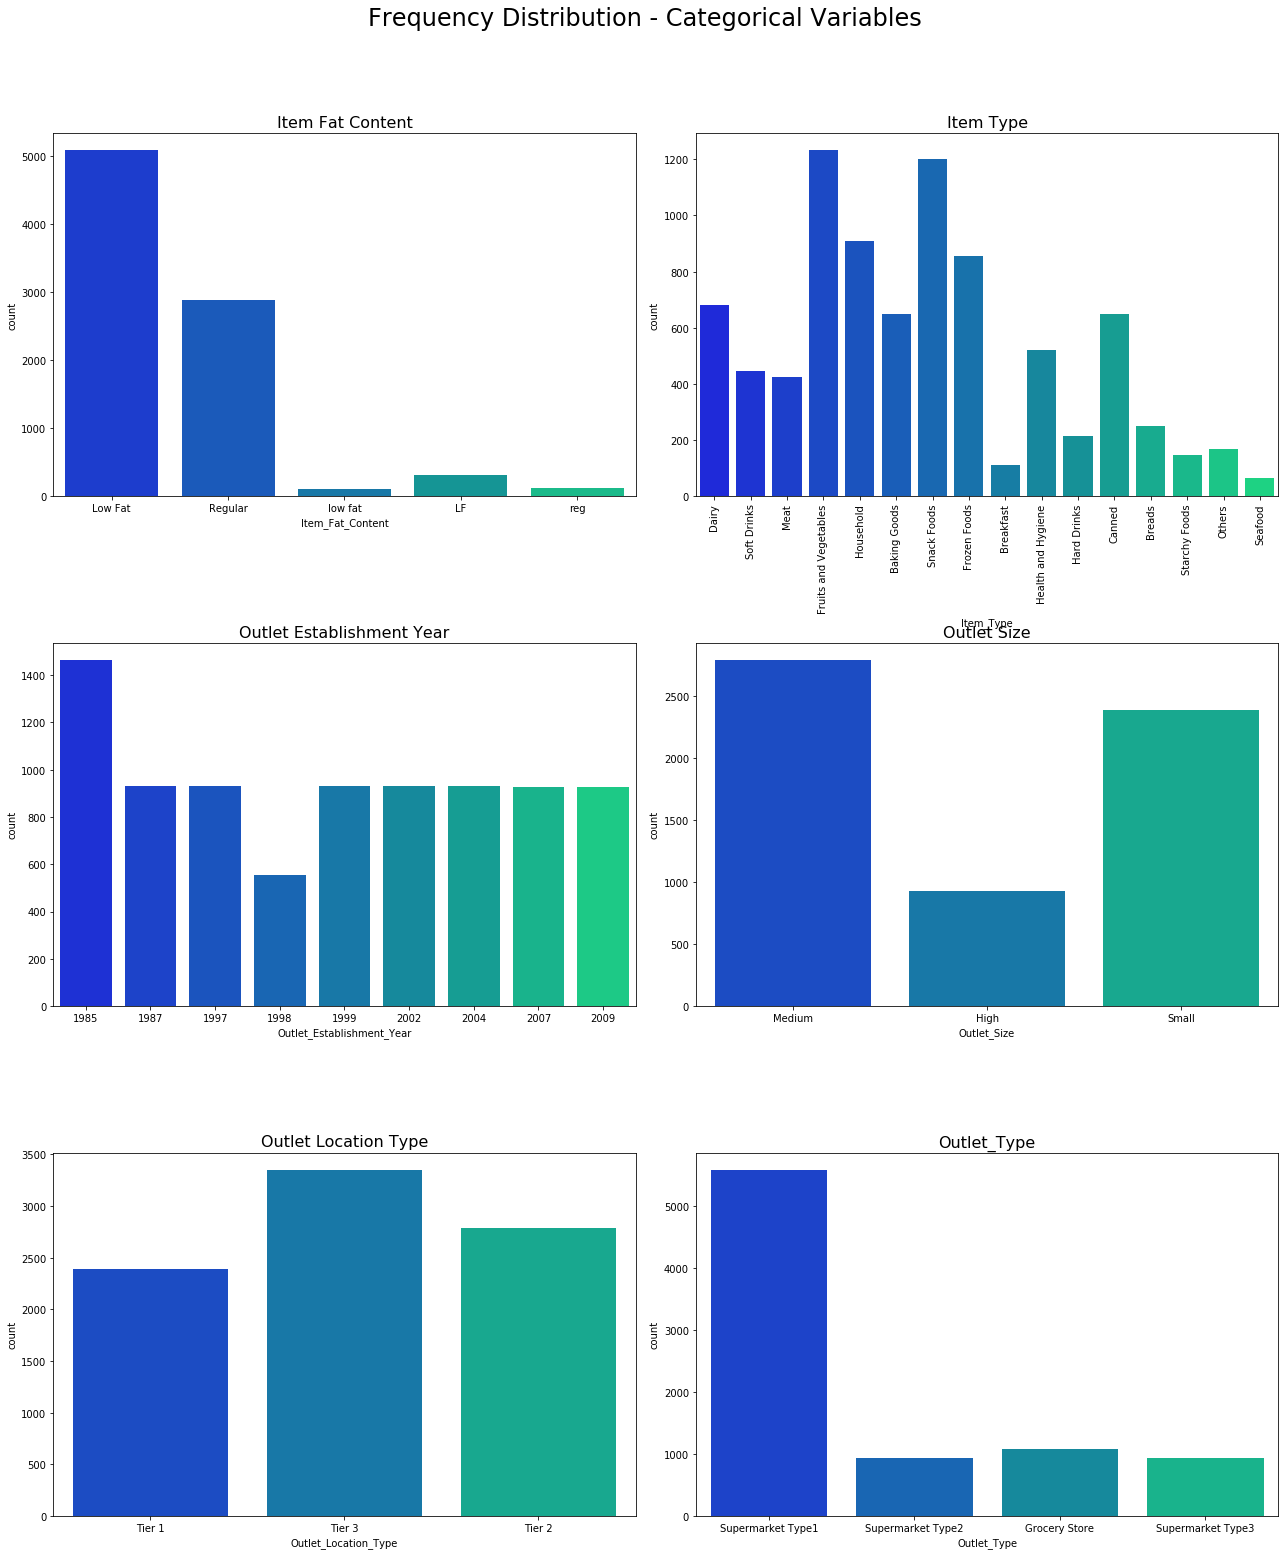

In [35]:
fig, ax = plt.subplots(3, 2, figsize = (18, 22))

plt.subplot(321)
sns.countplot(x = 'Item_Fat_Content', data = df, palette = 'winter')
plt.title('Item Fat Content', fontsize = 16)

plt.subplot(322)
sns.countplot(x = 'Item_Type', data = df, palette = 'winter')
plt.title('Item Type', fontsize = 16)
plt.xticks(rotation = 90)

plt.subplot(323)
sns.countplot(x = 'Outlet_Establishment_Year', data = df, palette = 'winter')
plt.title('Outlet Establishment Year', fontsize = 16)

plt.subplot(324)
sns.countplot(x = 'Outlet_Size', data = df, palette = 'winter')
plt.title('Outlet Size', fontsize = 16)

plt.subplot(325)
sns.countplot(x = 'Outlet_Location_Type', data = df, palette = 'winter')
plt.title('Outlet Location Type', fontsize = 16)

plt.subplot(326)
sns.countplot(x = 'Outlet_Type', data = df, palette = 'winter')
plt.title('Outlet_Type', fontsize = 16)

plt.tight_layout()
fig.suptitle('Frequency Distribution - Categorical Variables', fontsize = 24, va = 'top')
plt.subplots_adjust(top = 0.90)
plt.show()

Item Fat Content requires feature engineering as it has some incorrect entries. This will be taken care in the subsequent sections. Item Type has high cardinality which needs attention.

### Bivariate Analysis

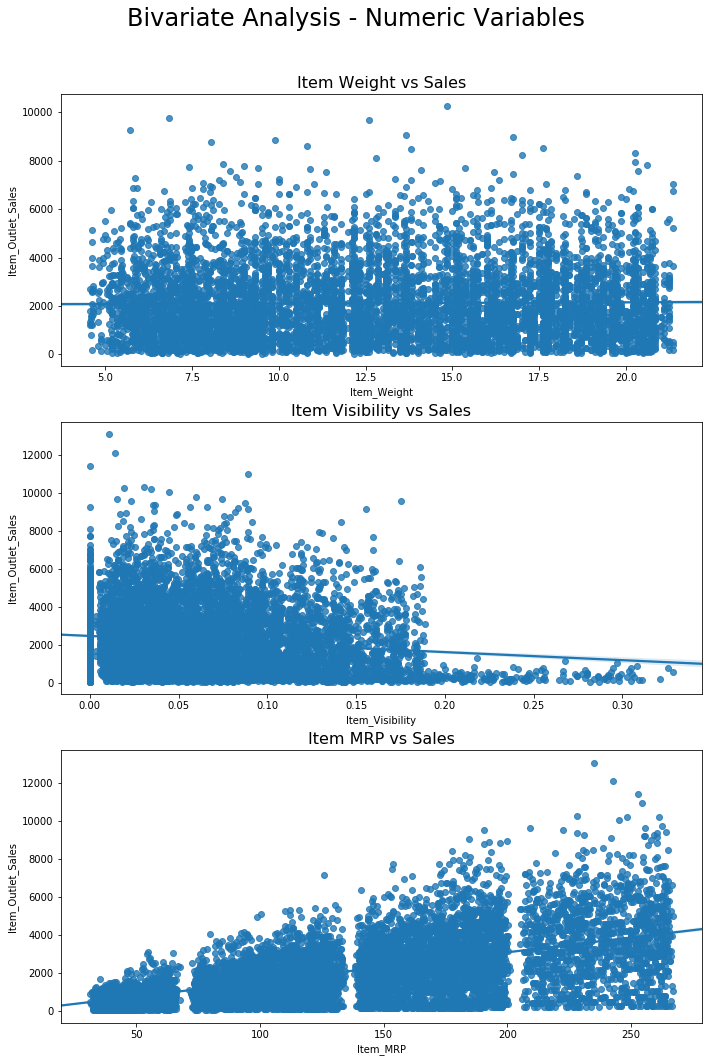

In [54]:
fig, ax = plt.subplots(figsize = (10, 15))

plt.subplot(311)
sns.regplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = df)
plt.title('Item Weight vs Sales', fontsize= 16)

plt.subplot(312)
sns.regplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = df)
plt.title('Item Visibility vs Sales', fontsize= 16)

plt.subplot(313)
sns.regplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = df)
plt.title('Item MRP vs Sales', fontsize= 16)

plt.tight_layout()
fig.suptitle('Bivariate Analysis - Numeric Variables', fontsize = 24, va = 'top')
plt.subplots_adjust(top = 0.90)
plt.show()

In [43]:
df['Item_Fat_Content'].replace({'LF' : 'Low Fat',
                               'low fat' : 'Low Fat',
                               'reg' : 'Regular'}, inplace = True)

In [49]:
df['Item_Type'] = df['Item_Identifier'].apply(lambda x:x[0:2])

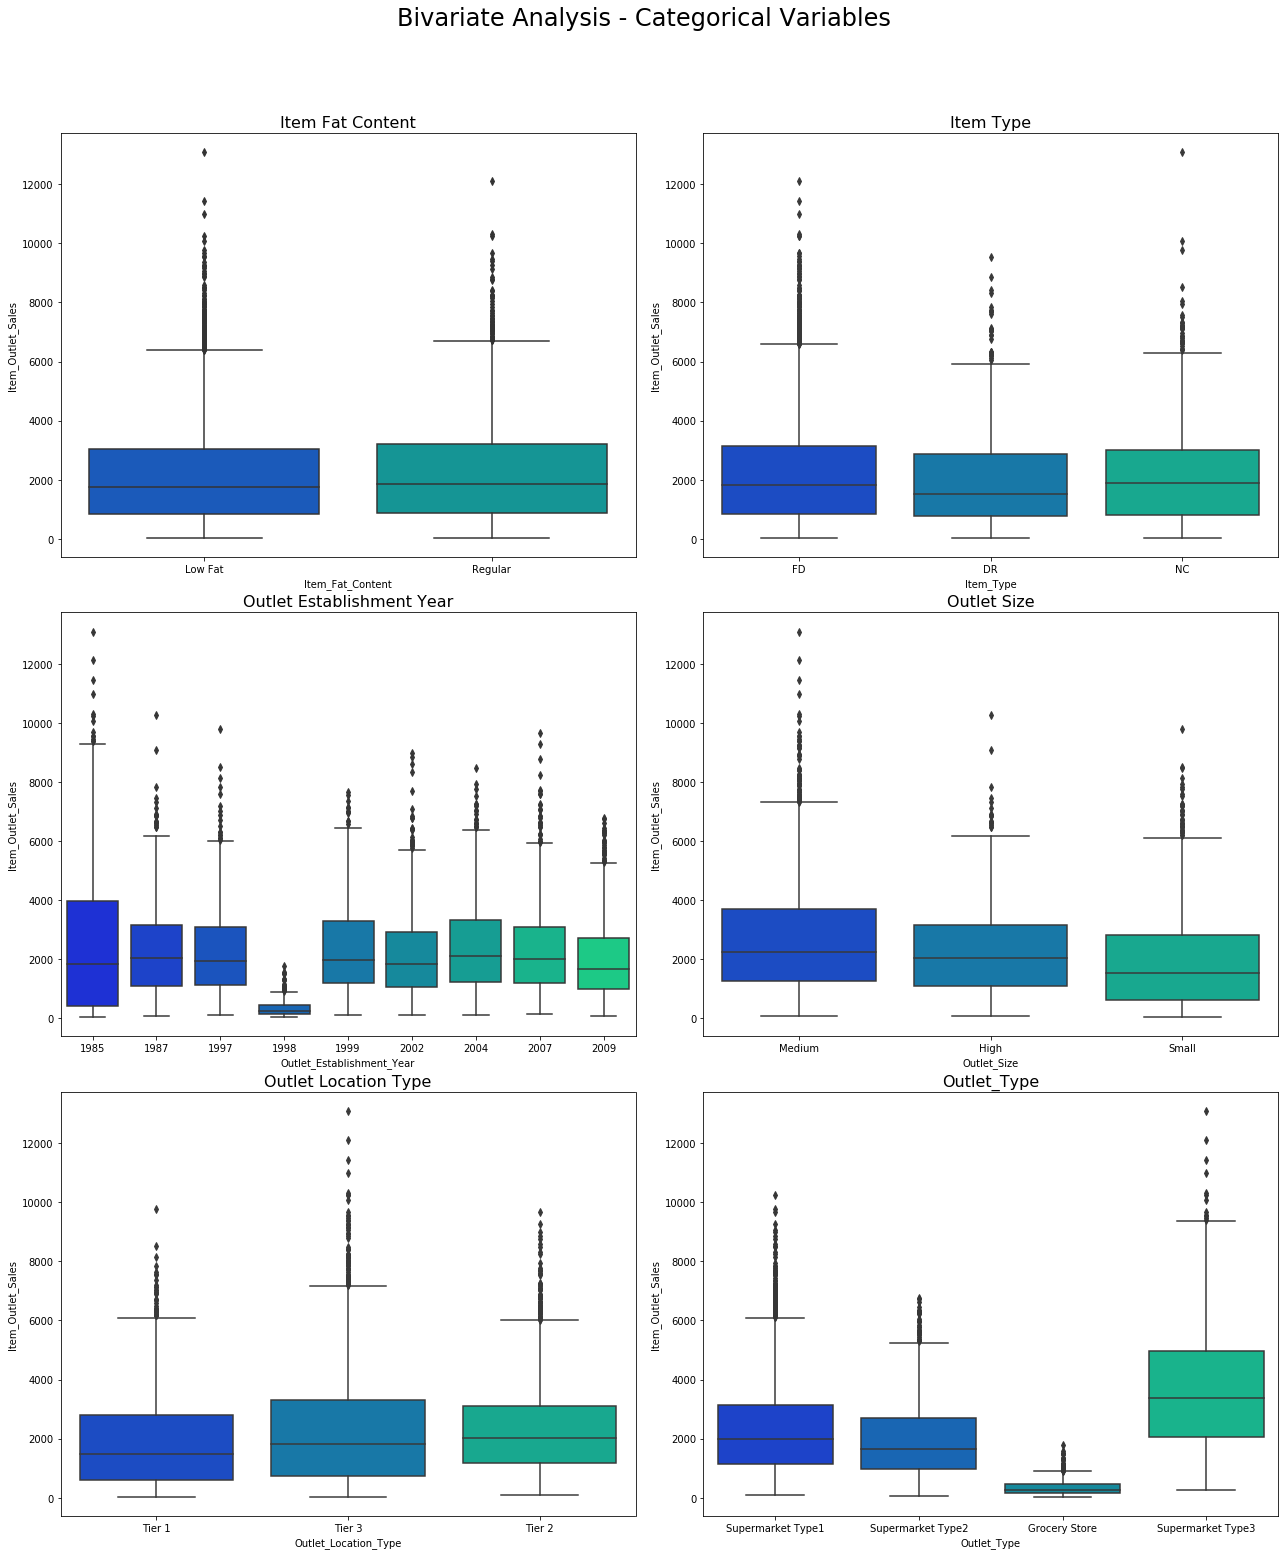

In [53]:
fig, ax = plt.subplots(3, 2, figsize = (18, 22))

plt.subplot(321)
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = df, palette = 'winter')
plt.title('Item Fat Content', fontsize = 16)

plt.subplot(322)
sns.boxplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = df, palette = 'winter')
plt.title('Item Type', fontsize = 16)

plt.subplot(323)
sns.boxplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = df, palette = 'winter')
plt.title('Outlet Establishment Year', fontsize = 16)

plt.subplot(324)
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = df, palette = 'winter')
plt.title('Outlet Size', fontsize = 16)

plt.subplot(325)
sns.boxplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data = df, palette = 'winter')
plt.title('Outlet Location Type', fontsize = 16)

plt.subplot(326)
sns.boxplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data = df, palette = 'winter')
plt.title('Outlet_Type', fontsize = 16)

plt.tight_layout()
fig.suptitle('Bivariate Analysis - Categorical Variables', fontsize = 24, va = 'top')
plt.subplots_adjust(top = 0.90)
plt.show()

## Feature Transformation

Let's create a feature based on the outlet establishment year.

In [55]:
df['Outlet_Age'] = 2013 - df['Outlet_Establishment_Year']

In [57]:
df.drop(columns = ['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'],
       inplace = True)

In [58]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,Low Fat,0.016047,FD,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,5.92,Regular,0.019278,DR,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4
2,17.50,Low Fat,0.016760,FD,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,19.20,Regular,0.000000,FD,182.0950,NaN,Tier 3,Grocery Store,732.3800,15
4,8.93,Low Fat,0.000000,NC,53.8614,High,Tier 3,Supermarket Type1,994.7052,26


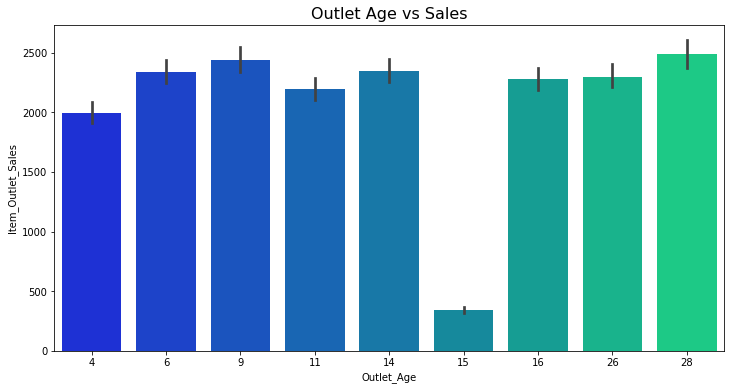

In [62]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(x = 'Outlet_Age', y = 'Item_Outlet_Sales', data = df, palette = 'winter')
plt.title('Outlet Age vs Sales', fontsize= 16)
plt.show()

In [63]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace = True)

The missing entries in the dataset are imputed by mean and mode techniques.

### Dummy Encoding

In [66]:
df_encoded = pd.get_dummies(df, drop_first = True)

In [67]:
pd.set_option('display.max_columns', 25)
df_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Regular,Item_Type_FD,Item_Type_NC,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,14,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,4,1,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,14,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,15,1,1,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,26,0,0,1,0,0,0,1,1,0,0


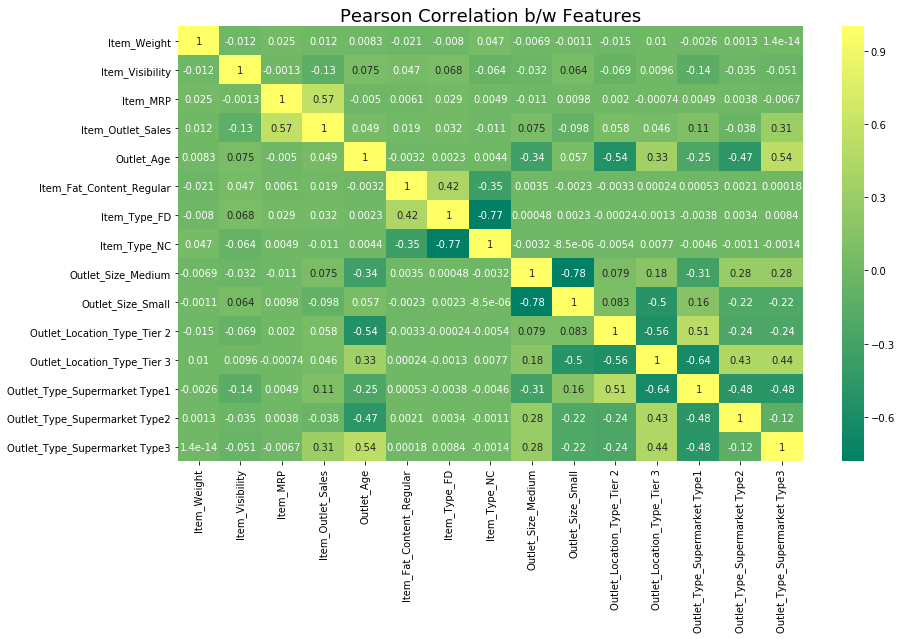

In [71]:
fig,ax = plt.subplots(figsize = (14, 8))

sns.heatmap(df_encoded.corr(), cmap = 'summer', annot = True)
plt.title('Pearson Correlation b/w Features', fontsize = 18)
plt.show()

In [72]:
X = df_encoded.drop(columns = ['Item_Outlet_Sales'])
y = df_encoded['Item_Outlet_Sales']

### Scaling - Standardization

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [76]:
df_scaled = pd.DataFrame(sc.fit_transform(X), columns = X.columns)

## Dimensionality Reduction

In [77]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [81]:
pca.explained_variance_ratio_

array([9.77359537e-01, 1.77087792e-02, 4.49792411e-03, 1.49961745e-04,
       9.85974153e-05, 6.69181162e-05, 3.81965181e-05, 3.25955115e-05,
       2.27423817e-05, 9.97575031e-06, 9.27983790e-06, 4.68888917e-06,
       6.07995244e-07, 1.95192469e-07])

As most of the variance is explained by the first two components, let's select the number of components as 2.

In [96]:
pca = PCA(n_components = 2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [97]:
pca.explained_variance_ratio_

array([0.97735954, 0.01770878])

In [101]:
X_dim = pca.fit_transform(X)

In [105]:
pd.DataFrame(X_dim).head()

,0,1
0,108.811030,-1.124755
1,-92.727652,-11.251323
2,0.633852,-1.151143
3,41.112969,-0.082021
4,-87.145413,10.764203


## Predictive Modelling

The metrics for evaluating the models are r2 score and rmse score.

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_dim, y, test_size = 0.25, random_state = 42)

In [110]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6392, 2)
(2131, 2)
(6392,)
(2131,)


### Baseline Model

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [113]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
knn = KNeighborsRegressor()
svr = SVR()

In [117]:
models = pd.DataFrame()
alg = []
r2 = []
rmse = []

for model in [lr, dt, rf, knn, svr]:
    mod = model.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    alg.append(model)
    r2.append(r2_score(y_test, y_pred))
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [120]:
models['Model'] = alg
models['R2 Score'] = r2
models['RMSE Score'] = rmse

In [122]:
models[['Model', 'R2 Score', 'RMSE Score']]

,Model,R2 Score,RMSE Score
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.321098,1368.602923
1,"DecisionTreeRegressor(criterion='mse', max_dep...",0.174020,1509.589426
2,"(DecisionTreeRegressor(criterion='mse', max_de...",0.484760,1192.282164
3,"KNeighborsRegressor(algorithm='auto', leaf_siz...",0.271319,1417.890610
4,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-0.025959,1682.437941


### Hyperparameter Tuning - Random Forest Model

In [131]:
estimators = []
rf_r2 = []
rf_rmse = []

for i in range(100, 700, 100):
    rf = RandomForestRegressor(n_estimators = i, bootstrap = True, n_jobs = -1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    estimators.append(i)
    rf_r2.append(r2_score(y_test, y_pred))
    rf_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [132]:
pd.DataFrame({'Estimators' : estimators,
             'R2' : rf_r2,
             'RMSE' : rf_rmse})

,Estimators,R2,RMSE
0,100,0.504069,1169.727490
1,200,0.501446,1172.816940
2,300,0.501414,1172.854948
3,400,0.503274,1170.665015
4,500,0.505532,1168.001198
5,600,0.505286,1168.291324


In [135]:
depth = []
rf_r2 = []
rf_rmse = []

for i in range(5, 20):
    rf = RandomForestRegressor(n_estimators = 500, max_depth = i, bootstrap = True, n_jobs = -1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    depth.append(i)
    rf_r2.append(r2_score(y_test, y_pred))
    rf_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [136]:
pd.DataFrame({'Depth' : depth,
             'R2' : rf_r2,
             'RMSE' : rf_rmse})

,Depth,R2,RMSE
0,5,0.485172,1191.804682
1,6,0.524076,1145.889295
2,7,0.553747,1109.595904
3,8,0.578169,1078.806194
4,9,0.581020,1075.154589
5,10,0.578229,1078.729191
6,11,0.570153,1089.007801
7,12,0.562828,1098.247202
8,13,0.551531,1112.346499
9,14,0.545254,1120.104064


### Bagging Regressor

In [157]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [154]:
est = []
br_r2 = []
br_rmse = []

for i in range(100, 600, 100):
    br = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth = 9),
                          n_estimators = i, bootstrap = True, 
                          n_jobs = -1, random_state = 56)
    br.fit(X_train, y_train)
    y_pred = br.predict(X_test)
    est.append(i)
    br_r2.append(r2_score(y_test, y_pred))
    br_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [155]:
pd.DataFrame({'Estimators' : est,
             'R2' : br_r2,
             'RMSE' : br_rmse})

,Estimators,R2,RMSE
0,100,0.580965,1075.224836
1,200,0.581191,1074.934174
2,300,0.580805,1075.429469
3,400,0.581334,1074.751658
4,500,0.580966,1075.223576


### AdaBoost Regressor

In [160]:
est = []
ab_r2 = []
ab_rmse = []

for i in range(100, 600, 100):
    ab = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth = 9),
                          n_estimators = i, learning_rate = 0.1, random_state = 56)
    ab.fit(X_train, y_train)
    y_pred = ab.predict(X_test)
    est.append(i)
    ab_r2.append(r2_score(y_test, y_pred))
    ab_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [161]:
pd.DataFrame({'Estimators' : est,
             'R2' : ab_r2,
             'RMSE' : ab_rmse})

,Estimators,R2,RMSE
0,100,0.560838,1100.744100
1,200,0.551803,1112.009680
2,300,0.520703,1149.943477
3,400,0.490191,1185.980744
4,500,0.473477,1205.265300


In [164]:
est = []
ab_r2 = []
ab_rmse = []

for i in range(5, 20):
    ab = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth = i),
                          n_estimators = 300, learning_rate = 0.1, random_state = 56)
    ab.fit(X_train, y_train)
    y_pred = ab.predict(X_test)
    est.append(i)
    ab_r2.append(r2_score(y_test, y_pred))
    ab_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [165]:
pd.DataFrame({'Estimators' : est,
             'R2' : ab_r2,
             'RMSE' : ab_rmse})

,Estimators,R2,RMSE
0,5,0.406520,1279.608521
1,6,0.420118,1264.863699
2,7,0.453162,1228.297088
3,8,0.481810,1195.689668
4,9,0.520703,1149.943477
5,10,0.540184,1126.331736
6,11,0.543596,1122.145090
7,12,0.536145,1131.267752
8,13,0.525518,1144.152719
9,14,0.508544,1164.438477


### Gradient Boosting Regressor

In [170]:
est = []
gb_r2 = []
gb_rmse = []

for i in range(100, 600, 100):
    gb = GradientBoostingRegressor(n_estimators = i, random_state = 56)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    est.append(i)
    gb_r2.append(r2_score(y_test, y_pred))
    gb_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [171]:
pd.DataFrame({'Estimators' : est,
             'R2' : gb_r2,
             'RMSE' : gb_rmse})

,Estimators,R2,RMSE
0,100,0.546006,1119.177315
1,200,0.559795,1102.051036
2,300,0.553629,1109.742103
3,400,0.547806,1116.956714
4,500,0.539438,1127.244836


### XG Boost Regressor

In [172]:
import xgboost as xgb

In [178]:
depth = []
xb_r2 = []
xb_rmse = []

for i in range(1, 20):
    xb = xgb.XGBRegressor(n_estimators = 200, max_depth = i, learning_rate = 0.1, 
                          n_jobs = -1, random_state = 56)
    xb.fit(X_train, y_train)
    y_pred = xb.predict(X_test)
    depth.append(i)
    xb_r2.append(r2_score(y_test, y_pred))
    xb_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

[19:37:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:23] WARNI

In [179]:
pd.DataFrame({'Depth' : depth,
             'R2' : xb_r2,
             'RMSE' : xb_rmse})

,Depth,R2,RMSE
0,1,0.403422,1282.943446
1,2,0.495430,1179.871733
2,3,0.566518,1093.602776
3,4,0.566108,1094.119289
4,5,0.569264,1090.133425
5,6,0.557329,1105.133280
6,7,0.545352,1119.983371
7,8,0.530888,1137.659259
8,9,0.516358,1155.144114
9,10,0.510078,1162.619789


### Final Model and Predictions

Since the bagging regressor has got the least rmse value, it has been chosen as the final model and the predictions are generated using this model.

In [182]:
br = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth = 9),
                          n_estimators = 200, bootstrap = True, 
                          n_jobs = -1, random_state = 56)
br.fit(X_train, y_train)
y_pred = br.predict(X_test)

print(r2_score(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.5811913773392465
1074.9341737327948


In [186]:
pd.DataFrame({'Actuals' : y_test,
             'Prediced' : y_pred}).sample(10)

,Actuals,Prediced
3870,296.2810,236.553571
3941,467.3916,553.563428
4747,3263.7516,2917.434992
6373,2669.1922,2154.982507
1971,5033.4480,3826.841328
218,3690.5294,2536.711928
2929,4604.6728,4125.988374
3341,299.6100,244.580829
4339,1114.5492,2141.593413
4269,4266.4464,4043.362867
